In [1]:
from IPython.core.display import Markdown, display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import traceback
import numpy as np
import scipy.stats as ss
import yaml
import itertools
import sys
import os
import subprocess
from os import path
import pickle
import pandas as pd
pd.options.display.width = 500
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 13]

from sklearn.linear_model import LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

def printmd(*args):
    display(Markdown(' '.join(map(str, args))))

In [2]:
!{"ros2 run local_planning_performance_modelling compute_metrics -s"}

finished computing metrics
finished writing results
runs not completed:
	/home/enrico/ds/performance_modelling/output/test_local_planning/session_2021-10-27_14-43-25_255613_run_000000076


In [3]:
local_planner_color = {'dwb': 'blue', 'rpp': 'orange', 'teb': 'green'}

In [4]:
df = pd.read_csv(path.expanduser("~/ds/performance_modelling/output/test_local_planning/results.csv"))
with open(path.expanduser("~/ds/performance_modelling/output/test_local_planning/results_info.yaml")) as results_info_file:
    results_info = yaml.safe_load(results_info_file)

run_parameters = [c for c in list(df.columns) if c in results_info['run_parameter_names']]
metrics_versions = [c for c in list(df.columns) if '_version' in c]
everything_else = ['run_id']
metrics = [c for c in df.columns if c not in metrics_versions + run_parameters + everything_else]
metrics_and_versions = [c for c in list(df.columns) if '_version' in c or c in metrics]

cpu_time_metrics = [c for c in metrics if 'cpu_time' in c]
max_memory_metrics = [c for c in metrics if 'max_memory' in c]
odometry_metrics = [c for c in metrics if 'odometry_error_alpha_' in c]

printmd("## Number of Runs")
printmd(f"    {len(df.run_id.unique())}")

printmd("## Run Parameters")
for name in run_parameters:
    values = list(df[name][df[name].notnull()].unique())
    printmd(f"    {name:<70}", sorted(values))

printmd("## Metrics")
for name in metrics_and_versions:
    if name in metrics_versions:
        if len(df[name].unique()) == 1:
            printmd(f"    {name:<70} {sorted(df[name].unique())}")
        else:
            printmd(f"<code><font style='background-color:yellow;font-family:monospace'>{name:<70}{sorted(df[name].unique())} </font></code> ⚠️")
    else:
        printmd(f"    {name:<70} min: {df[name].min(skipna=True):10.4g} {'avg':>15}: {df[name].mean(skipna=True):10.4g} {'max':>15}: {df[name].max(skipna=True):10.4g}]")


## Number of Runs

    347

## Run Parameters

    environment_name                                                       ['7A-2', 'airlab', 'fr079', 'intel', 'mexico', 'office_b']

    global_planner_node                                                    ['navfn', 'smac']

    local_planner_node                                                     ['dwb', 'rpp', 'teb']

    localization_node                                                      ['amcl']

    max_steering_angle_deg                                                 [20.0, 40.0, 90.0]

    robot_model                                                            ['hunter2', 'turtlebot3_waffle_performance_modelling']

    run_index                                                              [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

    alpha_1                                                                [0.0, 0.02, 0.05, 0.1]

    alpha_2                                                                [0.0]

    alpha_3                                                                [0.0, 0.02, 0.05, 0.1]

    alpha_4                                                                [0.0]

    odometry_error                                                         ['[0.0, 0.0, 0.0, 0.0]', '[0.01, 0.0, 0.01, 0.0]', '[0.02, 0.0, 0.02, 0.0]', '[0.05, 0.0, 0.05, 0.0]', '[0.1, 0.0, 0.1, 0.0]', '[2.0, 0.0, 2.0, 0.0]']

    odometry_mode                                                          ['encoder', 'ground_truth']

## Metrics

    controller_cpu_time                                                    min:       1.43             avg:      56.71             max:      695.2]

    planner_cpu_time                                                       min:       0.39             avg:      29.49             max:      505.9]

    system_cpu_time                                                        min:       3.41             avg:        100             max:       1375]

    controller_max_memory                                                  min:    2.4e+07             avg:   4.04e+07             max:  8.086e+07]

    planner_max_memory                                                     min:  2.623e+07             avg:  3.223e+08             max:  3.056e+10]

    system_max_memory                                                      min:  1.462e+08             avg:  4.903e+08             max:  3.075e+10]

    cpu_time_and_max_memory_version                                        [1]

    trajectory_length_version                                              [1]

    trajectory_length                                                      min:          0             avg:      20.14             max:      103.4]

    execution_time_version                                                 [1]

    execution_time                                                         min:      0.297             avg:      92.32             max:       1182]

    success_rate_version                                                   [1]

    success_rate                                                           min:          0             avg:     0.8127             max:          1]

    odometry_error_alpha_1_mean                                            min:          0             avg:    0.05012             max:      3.245]

    odometry_error_alpha_1_std                                             min:          0             avg:     0.1468             max:      14.23]

    odometry_error_alpha_2_mean                                            min:          0             avg:    0.06853             max:      4.537]

    odometry_error_alpha_2_std                                             min:          0             avg:     0.1624             max:      7.752]

    odometry_error_alpha_3_mean                                            min:  2.315e-17             avg:    0.02612             max:     0.4992]

    odometry_error_alpha_3_std                                             min:  1.864e-17             avg:    0.01599             max:     0.7327]

    odometry_error_alpha_4_mean                                            min:  6.149e-18             avg:     0.0848             max:     0.5667]

    odometry_error_alpha_4_std                                             min:  1.275e-17             avg:     0.0866             max:      0.621]

    odometry_error_version                                                 [1]

    localization_update_absolute_translation_error_mean                    min:  0.0009618             avg:     0.5676             max:       51.9]

    localization_update_absolute_translation_error_std                     min:  0.0004627             avg:     0.4411             max:      39.83]

    localization_update_absolute_rotation_error_mean                       min:   0.001959             avg:    0.06296             max:      1.668]

    localization_update_absolute_rotation_error_std                        min:  0.0002904             avg:    0.06898             max:       1.19]

    localization_update_relative_translation_error_mean                    min:  0.0006831             avg:   0.009932             max:      0.136]

    localization_update_relative_translation_error_std                     min:  0.0003619             avg:    0.01317             max:     0.5118]

    localization_update_relative_rotation_error_mean                       min:  0.0005984             avg:    0.01344             max:     0.2619]

    localization_update_relative_rotation_error_std                        min:  0.0003118             avg:    0.04043             max:     0.5354]

    localization_update_normalized_relative_translation_error_mean         min:   0.004089             avg:     0.0664             max:     0.9581]

    localization_update_normalized_relative_translation_error_std          min:    0.00153             avg:     0.1203             max:      5.165]

    localization_update_normalized_relative_rotation_error_mean            min:   0.003725             avg:     0.2368             max:      7.546]

    localization_update_normalized_relative_rotation_error_std             min:   0.002454             avg:          1             max:      33.86]

    localization_update_error_version                                      [1]

    localization_update_rate_mean                                          min:     0.4556             avg:     0.9915             max:      4.678]

    localization_update_rate_std                                           min:    0.04079             avg:     0.4856             max:      14.05]

    localization_update_rate_version                                       [1]

In [5]:
print(len(df.run_id.unique()))

347


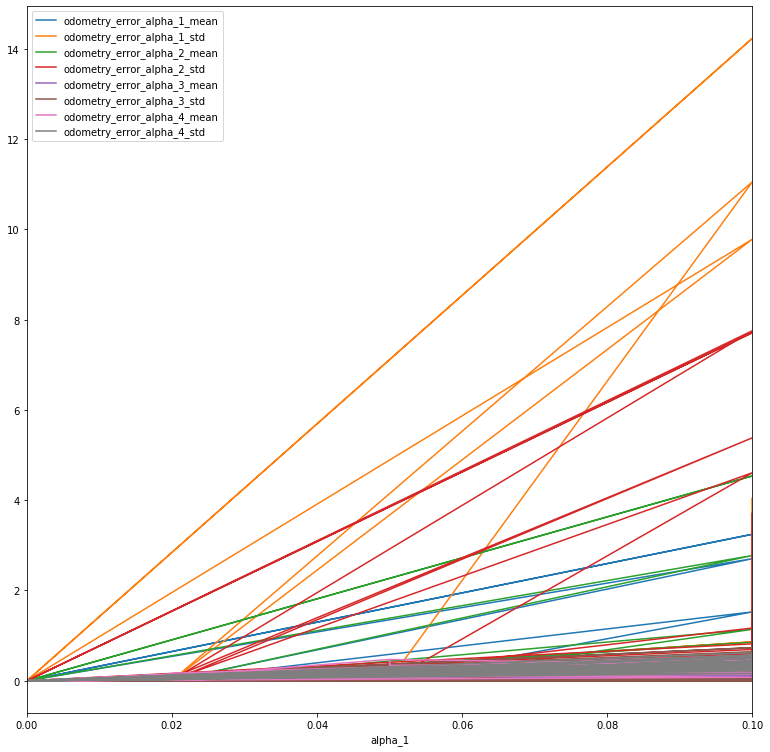

In [15]:
df[df.alpha_1.isin([0.0, 0.01, 0.02, 0.05, 0.1])][['alpha_1']].plot(x='alpha_1')

In [20]:
df[df.alpha_1.notna()][['alpha_1'] + odometry_metrics].sort_values('alpha_1')

,alpha_1,odometry_error_alpha_1_mean,odometry_error_alpha_1_std,odometry_error_alpha_2_mean,odometry_error_alpha_2_std,odometry_error_alpha_3_mean,odometry_error_alpha_3_std,odometry_error_alpha_4_mean,odometry_error_alpha_4_std
64,0.0,3.487432e-17,6.802212e-17,2.667277e-17,1.121182e-16,7.004437e-17,9.151142e-17,3.307642e-16,5.995639e-16
209,0.0,4.968093e-17,7.261699e-17,2.932207e-17,9.151082e-17,1.045387e-16,1.033942e-16,7.011109e-16,1.039282e-15
68,0.0,2.631491e-17,5.149173e-17,1.308389e-17,5.251532e-17,7.084279e-17,9.175361e-17,3.990520e-16,7.451753e-16
189,0.0,2.780592e-17,6.000030e-17,1.383572e-17,4.941656e-17,7.964576e-17,9.318276e-17,3.760773e-16,5.962765e-16
220,0.0,5.395251e-17,8.845351e-17,6.809593e-18,1.780495e-17,8.615400e-17,9.815627e-17,7.719234e-16,1.189627e-15
...,...,...,...,...,...,...,...,...,...
56,0.1,1.045620e-01,3.951158e-02,3.624045e-01,6.027811e-01,1.210619e-01,1.922025e-02,2.611378e-01,2.662692e-01
201,0.1,2.099315e-01,8.622167e-01,8.528530e-01,5.380674e+00,1.083897e-01,2.798177e-02,3.969469e-01,5.310658e-01
208,0.1,1.292559e-01,2.999507e-02,2.216791e-01,1.752202e-01,1.191555e-01,1.458070e-02,7.756572e-02,1.624457e-01
275,0.1,1.033089e-01,4.225810e-02,1.610479e-02,2.653815e-02,1.085605e-01,3.427191e-03,5.311353e-01,5.660879e-01


In [8]:
df.groupby([df.robot_model, df.local_planner_node, df.global_planner_node])[metrics].agg(['min', 'mean', 'max'])

controller_cpu_time                     planner_cpu_time                    system_cpu_time                      controller_max_memory  ... localization_update_normalized_relative_rotation_error_mean localization_update_normalized_relative_rotation_error_std                      localization_update_rate_mean                     localization_update_rate_std                     
                                                                                               min        mean     max              min       mean     max             min        mean      max                   min  ...                                                         max                                                        min      mean        max                           min      mean       max                          min      mean        max
robot_model                             local_planner_node global_planner_node                                                                                                                                         ...                                                                                                                                                                                                                                                
hunter2                                 teb                navfn                             42.47  158.187500  409.34             5.66  33.055000   96.16           52.73  206.093333   532.85              68909056  ...                                           0.091080                                                    0.005114          0.071620   0.196569                      1.079379  1.589562  4.157143                     0.204616  1.389916   7.011186
                                                           smac                               3.51   85.566667  209.54             0.72  31.465833   98.88            5.27  125.652500   294.26              68308992  ...                                           0.049614                                                    0.012589          0.057952   0.091005                      1.047118  1.566955  2.983500                     0.252213  1.257915   4.435241
turtlebot3_waffle_performance_modelling dwb                navfn                              1.43   41.621708  695.21             0.47  28.763488  505.93            3.41   84.534235  1375.48              30645248  ...                                           7.546265                                                    0.002454          1.132113  33.860589                      0.455611  0.942418  4.677616                     0.040786  0.423705  14.048885
                                        rpp                navfn                              5.00   26.210000   49.23             4.51  24.765000   46.89           13.06   62.386667   115.26              24002560  ...                                           2.603327                                                    0.079629          1.744659   5.524493                      0.542105  0.636596  0.722891                     0.062434  0.612738   0.812985
                                        teb                navfn                             26.97  147.050000  396.55             1.49  32.320000  102.46           30.74  193.142778   529.92              69536768  ...                                           0.321872                                                    0.023840          0.228975   1.544847                      0.738462  1.066748  1.266263                     0.154560  0.325272   0.509902
                                                           smac                               3.90  125.207778  462.75             0.39  35.978333  158.70            5.34  173.020556   673.89              66836480  ...                                           0.485938                                                    0.023635          0.364986   4.067819                      0.707407  1.190916  3.33482

controller_cpu_time                     planner_cpu_time                    system_cpu_time                     
                                                                                               min        mean     max              min       mean     max             min        mean      max
robot_model                             local_planner_node global_planner_node                                                                                                                 
turtlebot3_waffle_performance_modelling rpp                navfn                              5.00   26.210000   49.23             4.51  24.765000   46.89           13.06   62.386667   115.26
                                        dwb                navfn                              1.43   41.621708  695.21             0.47  28.763488  505.93            3.41   84.534235  1375.48
hunter2                                 teb                smac                               3.51   85.566667  209.54             0.72  31.465833   98.88            5.27  125.652500   294.26
turtlebot3_waffle_performance_modelling teb                smac                               3.90  125.207778  462.75             0.39  35.978333  158.70            5.34  173.020556   673.89
                                                           navfn                             26.97  147.050000  396.55             1.49  32.320000  102.46           30.74  193.142778   529.92
hunter2                                 teb                navfn                             42.47  158.187500  409.34             5.66  33.055000   96.16           52.73  206.093333   532.85

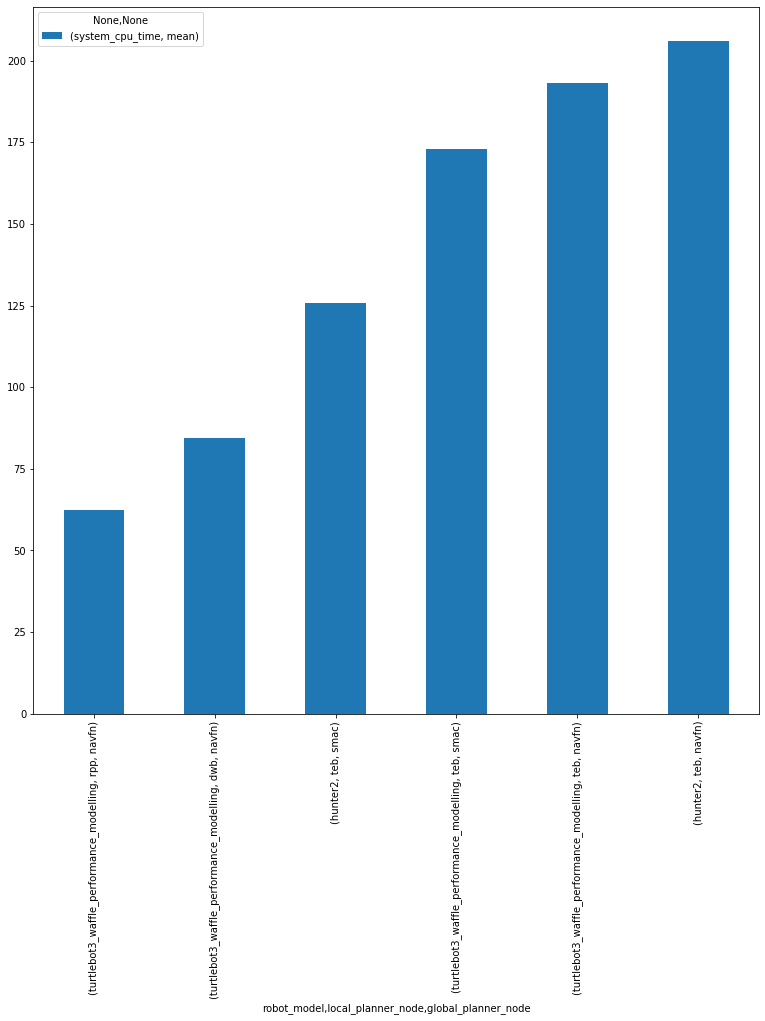

In [9]:
cpu_time_metrics_df = df.groupby([df.robot_model, df.local_planner_node, df.global_planner_node])[cpu_time_metrics].agg(['min', 'mean', 'max']).sort_values(by=('system_cpu_time', 'mean'))
cpu_time_metrics_df.plot.bar(y=('system_cpu_time', 'mean'))
cpu_time_metrics_df

controller_max_memory                       planner_max_memory                            system_max_memory                           
                                                                                                 min       mean        max                min         mean           max               min         mean           max
robot_model                             local_planner_node global_planner_node                                                                                                                                       
turtlebot3_waffle_performance_modelling rpp                navfn                           22.890625  26.238770  32.753906          25.380859    57.958822    130.758789        139.409180   208.888835    369.644531
                                        dwb                navfn                           29.225586  32.301654  40.315430          25.010742    57.162634    147.778320        143.373047   210.514871    391.328125
                                        teb                navfn                           66.315430  69.627984  77.044922          25.609375    58.357422    132.798828        184.069336   252.851074    415.806641
hunter2                                 teb                navfn                           65.716797  69.741536  77.118164          25.868164    59.276530    133.355469        183.836914   254.319255    416.774414
turtlebot3_waffle_performance_modelling teb                smac                            63.740234  68.021810  75.485352          30.892578  1651.488878  28802.347656        187.614258  1843.336751  28979.913086
hunter2                                 teb                smac                            65.144531  68.496338  76.280273          31.160156  4896.764730  29145.259766        188.694336  5089.505534  29326.842773

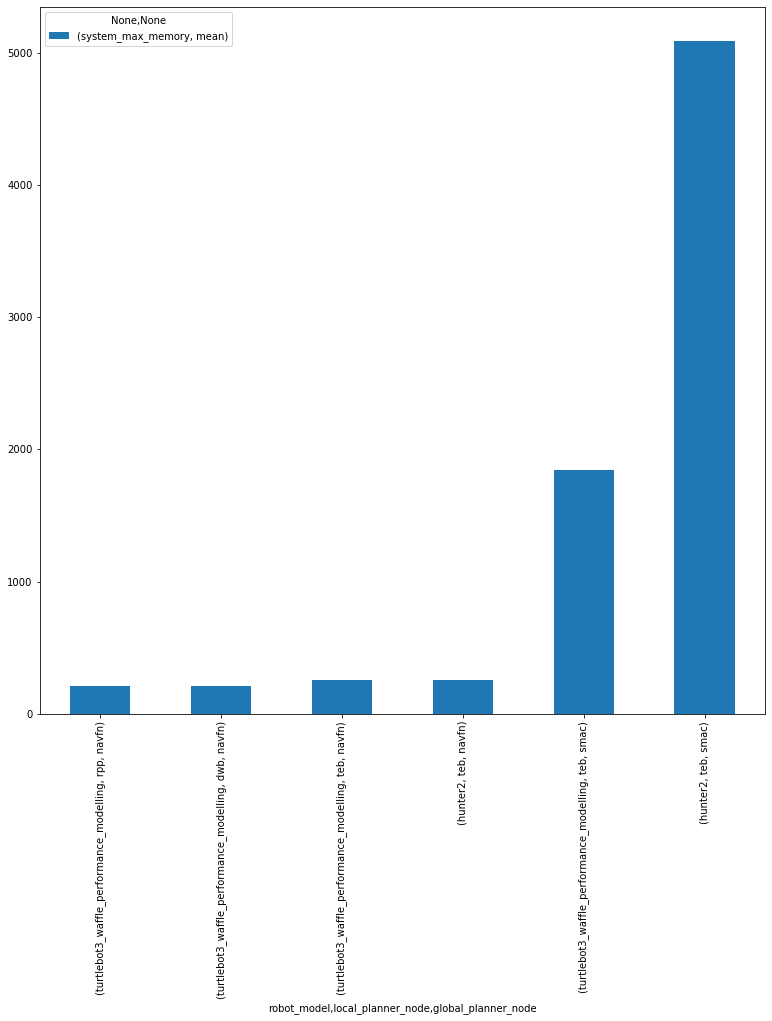

In [10]:
cpu_time_metrics_df = df.groupby([df.robot_model, df.local_planner_node, df.global_planner_node])[max_memory_metrics].agg(['min', 'mean', 'max']).sort_values(by=('system_max_memory', 'mean'))/1024**2
cpu_time_metrics_df.plot.bar(y=('system_max_memory', 'mean'))
cpu_time_metrics_df